In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Scikit learn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, mean_absolute_error, classification_report
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("crop_yield_train.csv")

# ***Cleaning and Prepration***

In [5]:
# Inspecting the first 5 rows
df.head(5)

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Jharkhand,RAMGARH,Potato,2013,Winter,1361.0,7544.0,5.54
1,Jammu and Kashmir,REASI,Moong(Green Gram),2015,Kharif,13.0,9.0,0.70
2,Haryana,GURGAON,Sweet potato,2009,Whole Year,39.0,800.0,20.51
3,Uttar Pradesh,JALAUN,Sannhamp,2010,Kharif,9.0,3.0,0.33
4,Tamil Nadu,MADURAI,Sugarcane,2006,Whole Year,6006.0,656204.0,109.26


In [6]:
# checking the shape of data
df.shape

(276268, 8)

In [7]:
# Checking the data type
df.dtypes

State          object
District       object
Crop           object
Crop_Year       int64
Season         object
Area          float64
Production    float64
Yield         float64
dtype: object

In [8]:
# Checking for null values
df.isnull().sum()

State            0
District         0
Crop             6
Crop_Year        0
Season           0
Area             0
Production    3967
Yield            0
dtype: int64

In [9]:
# Deleting the null vlaues
df.dropna(inplace=True)
df.isnull().sum()

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64

In [10]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(272298, 8)

In [12]:
df['Area ']


0         1361.0
1           13.0
2           39.0
3            9.0
4         6006.0
           ...  
276262      17.0
276263      13.0
276264    5991.0
276265      63.0
276267     279.0
Name: Area , Length: 272298, dtype: float64

In [13]:
# Removing extraspaces form columns
df.columns = df.columns.str.strip()

In [14]:
# Checking for Eiter Production = 0 or Yield = 0
df[(df['Area'] == 0) | (df['Production'] == 0)]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
162,Maharashtra,SATARA,Sesamum,1999,Rabi,100.0,0.0,0.00
572,Haryana,PANCHKULA,Turmeric,2000,Whole Year,1.0,0.0,0.00
804,Maharashtra,AMRAVATI,Bajra,2015,Kharif,100.0,0.0,0.00
1037,Karnataka,HAVERI,Cardamom,2018,Whole Year,2.0,0.0,0.10
1379,Madhya Pradesh,KHANDWA,Niger seed,2001,Kharif,2.0,0.0,0.01
...,...,...,...,...,...,...,...,...
274930,Kerala,WAYANAD,other oilseeds,2002,Whole Year,1.0,0.0,0.00
275323,Uttar Pradesh,GONDA,Moong(Green Gram),2001,Kharif,2.0,0.0,0.05
275742,Madhya Pradesh,SAGAR,Bajra,2002,Kharif,1.0,0.0,0.10
275912,Rajasthan,PALI,Banana,2003,Whole Year,1.0,0.0,0.00


In [15]:
# Droping the low area (Area<10) where production is 0 (It will remove the noise from the data)
df = df[~((df['Production'] == 0) & (df['Area'] < 10))]

In [16]:
df[(df['Area'] == 0) | (df['Production'] == 0)]

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
162,Maharashtra,SATARA,Sesamum,1999,Rabi,100.0,0.0,0.0
804,Maharashtra,AMRAVATI,Bajra,2015,Kharif,100.0,0.0,0.0
1595,Haryana,REWARI,Sesamum,2003,Kharif,160.0,0.0,0.0
2174,Rajasthan,NAGAUR,Moth,2003,Whole Year,72.0,0.0,0.0
2229,Haryana,REWARI,Gram,2002,Rabi,304.0,0.0,0.0
...,...,...,...,...,...,...,...,...
271292,Haryana,AMBALA,Bajra,1999,Kharif,371.0,0.0,0.0
271692,Haryana,KURUKSHETRA,Maize,2003,Kharif,260.0,0.0,0.0
271794,Himachal Pradesh,KULLU,Moong(Green Gram),1999,Kharif,10.0,0.0,0.0
273571,Haryana,BHIWANI,Maize,2003,Kharif,91.0,0.0,0.0


Zero-yield cases were carefully evaluated. We preserved those with significant area under cultivation (Area ≥ 10 hectares), as they provide insight into real-world crop failure, improving the model’s ability to generalize and flag risk scenarios

In [17]:
# Checking Caterogical columns
print(df['State'].unique(), '\n')
print(df['District'].unique(), '\n')
print(df['Crop'].unique(), '\n')
print(df['Season'].unique())

['Jharkhand' 'Jammu and Kashmir' 'Haryana' 'Uttar Pradesh' 'Tamil Nadu'
 'Tripura' 'Rajasthan' 'Andhra Pradesh' 'Karnataka' 'Madhya Pradesh'
 'Assam' 'Bihar' 'West Bengal' 'Maharashtra' 'Odisha' 'Chhattisgarh'
 'Meghalaya' 'Gujarat' 'Arunachal Pradesh' 'Himachal Pradesh' 'Manipur'
 'Nagaland' 'Uttarakhand' 'Kerala' 'Goa' 'Mizoram' 'Telangana' 'Punjab'
 'THE DADRA AND NAGAR HAVELI' 'Laddak' 'Puducherry' 'Delhi'
 'Andaman and Nicobar Island' 'CHANDIGARH' 'Sikkim' 'Daman and Diu'
 'Dadra and Nagar Haveli'] 

['RAMGARH' 'REASI' 'GURGAON' 'JALAUN' 'MADURAI' 'BALLIA' 'FARIDABAD'
 'NORTH TRIPURA' 'PALI' 'EAST GODAVARI' 'UDUPI' 'BHIND' 'DIMA HASAO'
 'SAMASTIPUR' 'KATIHAR' 'BIRBHUM' 'DAVANGERE' 'NAGPUR' 'SATARA' 'ARARIA'
 'SONEPUR' 'SRIKAKULAM' 'MANDYA' 'GOPALGANJ' 'BULANDSHAHR' 'BALRAMPUR'
 'VARANASI' 'NALGONDA' 'SIROHI' 'LALITPUR' 'BEGUSARAI' 'BIDAR'
 'GARIYABAND' 'KANCHIPURAM' 'HOSHANGABAD' 'EAST GARO HILLS'
 'SIDDHARTH NAGAR' 'TUMAKURU' 'ALIGARH' 'KOLAR' 'HASSAN' 'KAMRUP METRO'
 'NARMADA' '

In [18]:
# Removing the white spaces and /n from the dataset

df_categorical = df.select_dtypes(include='object')

# Apply strip and replace operations directly to the DataFrame
for col in df_categorical.columns:
    df[col] = df[col].str.strip().str.replace('\n', '')


In [19]:
df['Season'].unique()

array(['Winter', 'Kharif', 'Whole Year', 'Rabi', 'Summer', 'Autumn'],
      dtype=object)

# ***Exploratory Data Analysis (EDA)***

In [20]:
# Dataset summary
print(df.info(), '\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 271662 entries, 0 to 276267
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       271662 non-null  object 
 1   District    271662 non-null  object 
 2   Crop        271662 non-null  object 
 3   Crop_Year   271662 non-null  int64  
 4   Season      271662 non-null  object 
 5   Area        271662 non-null  float64
 6   Production  271662 non-null  float64
 7   Yield       271662 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None 

           Crop_Year          Area    Production          Yield
count  271662.000000  2.716620e+05  2.716620e+05  271662.000000
mean     2008.890647  1.185797e+04  9.712363e+05      80.853616
std         6.572557  4.640081e+04  2.181500e+07     921.921833
min      1997.000000  1.000000e-02  0.000000e+00       0.000000
25%      2003.000000  8.000000e+01  8.900000e+01       0.570000
50%      2009.000000 

In [21]:
# Checking categrical columns
df.describe(include='object')

,State,District,Crop,Season
count,271662,271662,271662,271662
unique,37,707,55,6
top,Uttar Pradesh,BILASPUR,Rice,Kharif
freq,35546,956,17150,108598


***1. Categorical Distributions***

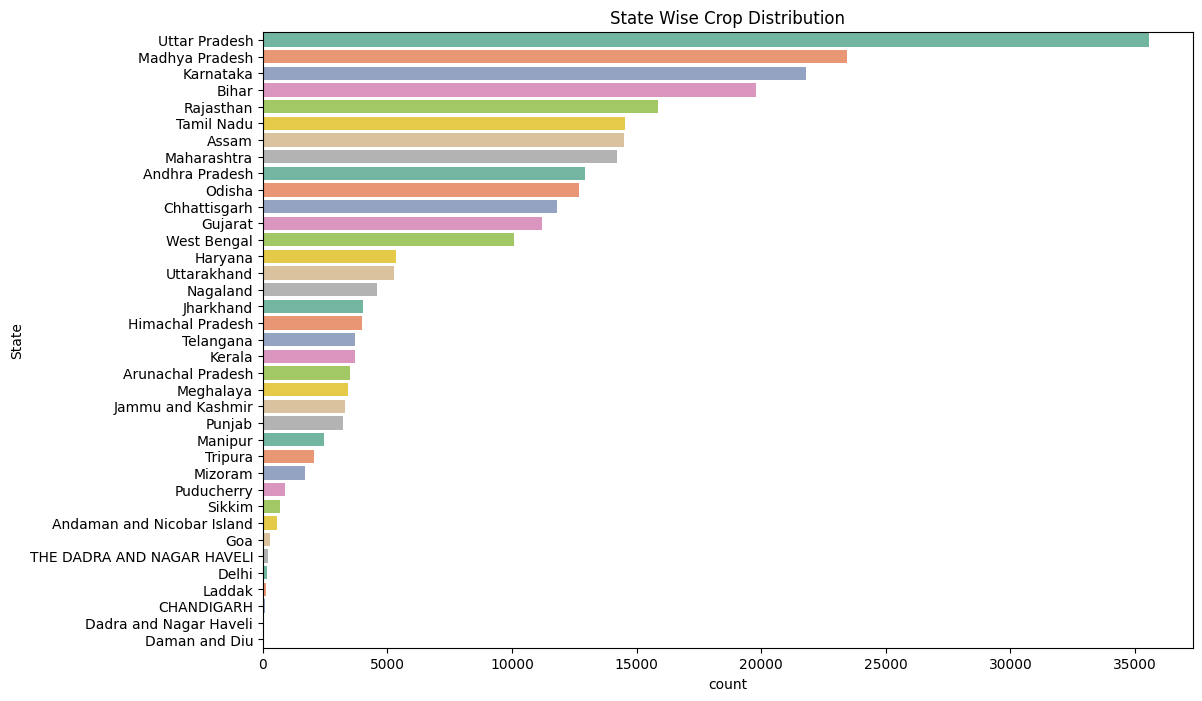

In [22]:
# State wise distribution of crop
plt.figure(figsize=(12, 8))
sns.countplot(y='State', data=df, palette='Set2', order=df['State'].value_counts().index)
plt.title('State Wise Crop Distribution')
plt.show()

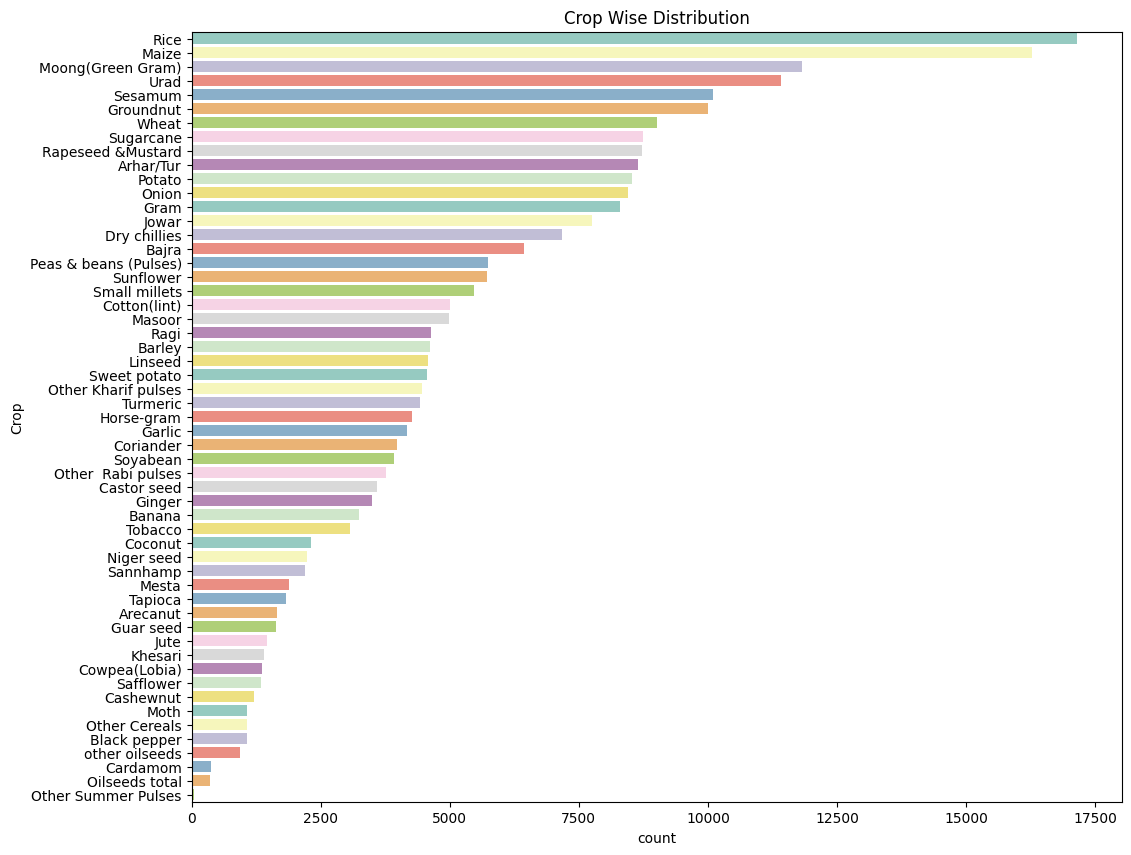

In [23]:
# Crop distribution
plt.figure(figsize=(12, 10))
sns.countplot(y='Crop', data=df, palette='Set3', order=df['Crop'].value_counts().index)
plt.title('Crop Wise Distribution')
plt.show()

***2. Yield Distribution:***

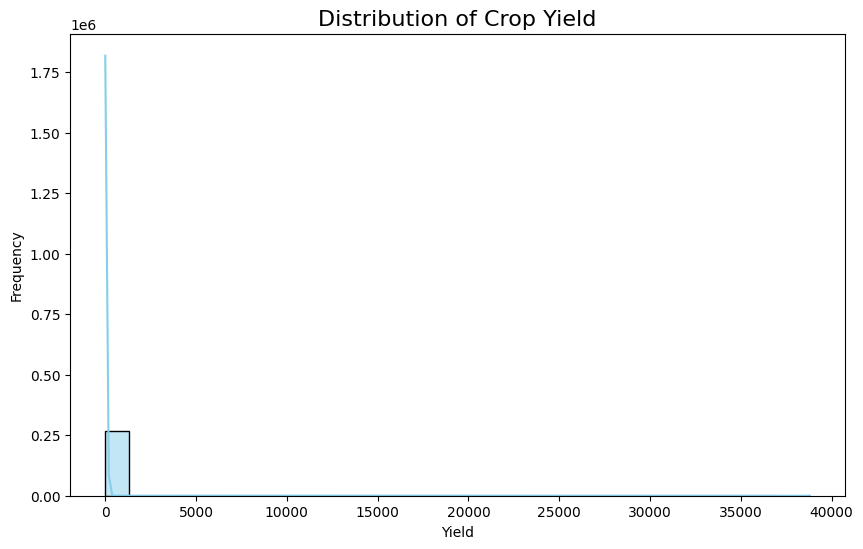

In [24]:
# Histogram of Yield
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Crop Yield', fontsize=16)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.show()


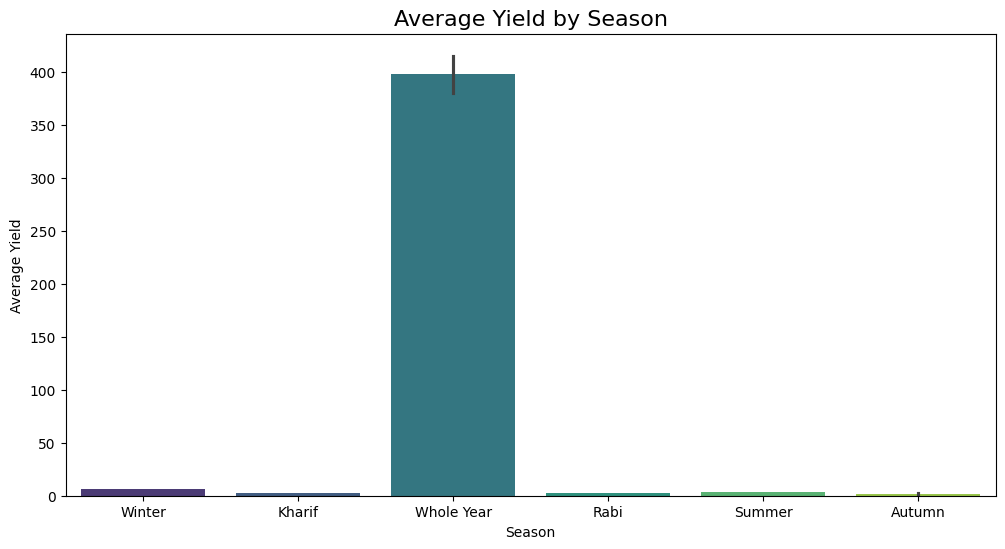

In [25]:
# Average Yield by Season (Bar Plot)
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Yield', data=df, palette='viridis') # It will automatically calculte the yield for each category
plt.title('Average Yield by Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Average Yield')
plt.show()


***3. Production vs Area:***

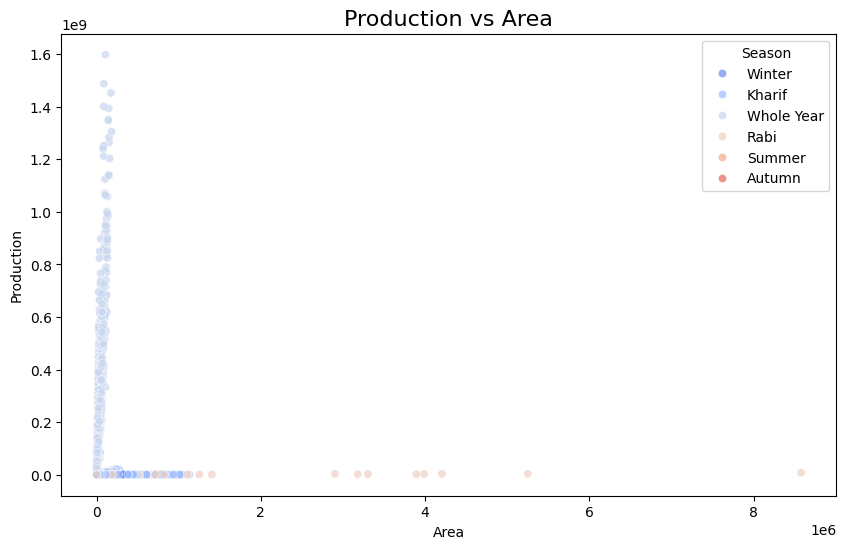

In [26]:
# Scatter plot: Area vs Production
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Production', data=df, hue='Season', palette='coolwarm', alpha=0.7)
plt.title('Production vs Area', fontsize=16)
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()


***4. Crop Yield by State***

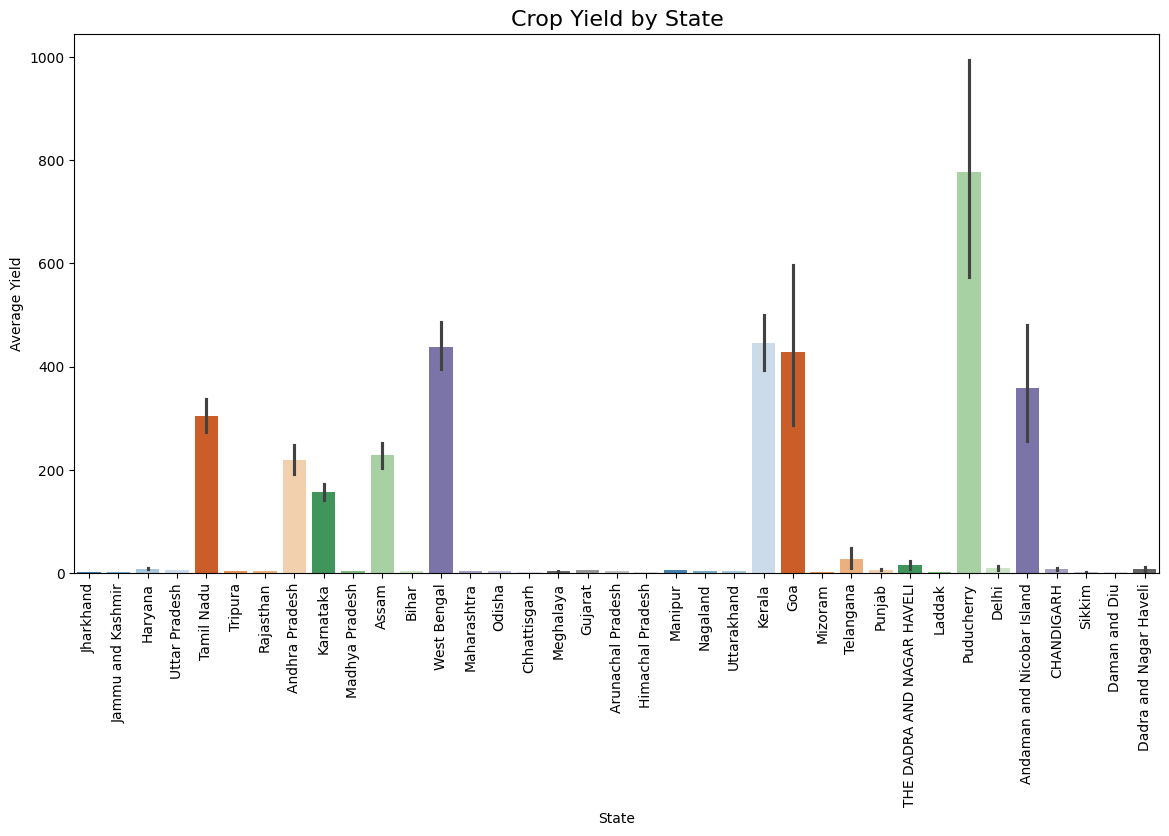

In [27]:
# Crop Yield by State
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Yield', data=df, palette='tab20c')
plt.title('Crop Yield by State', fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Yield')
plt.show()


The small vertical line in the middle of each bar is the error bar, showing how much variability or uncertainty there is in that estimate.

***5. Pie Chart for Crop Types***

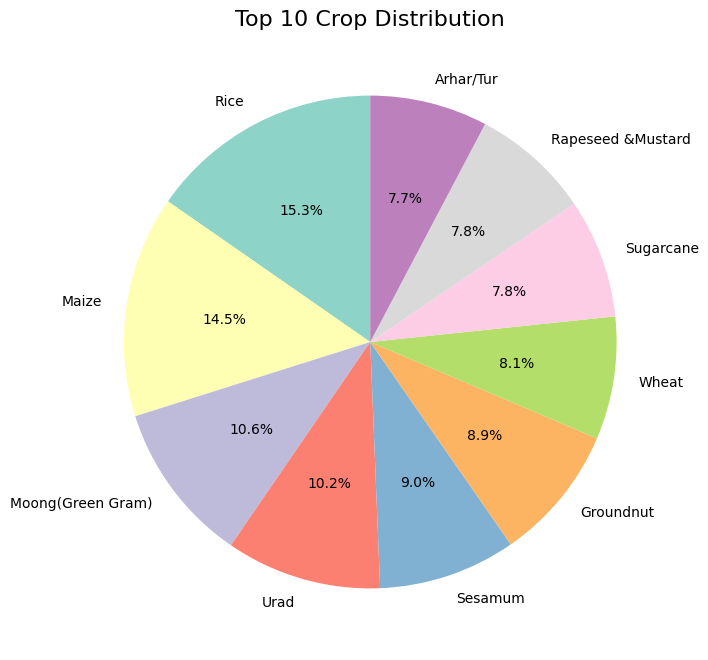

In [28]:
# Assuming df is your DataFrame
crop_counts = df['Crop'].value_counts()

# Select the top 10 crops
top_10_crops = crop_counts.head(10)

# Plot the pie chart for the top 5 crops
plt.figure(figsize=(8, 8))
top_10_crops.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_10_crops)))
plt.title('Top 10 Crop Distribution', fontsize=16)
plt.ylabel('')
plt.show()


***6. Correlation Heatmap with Color Scale***

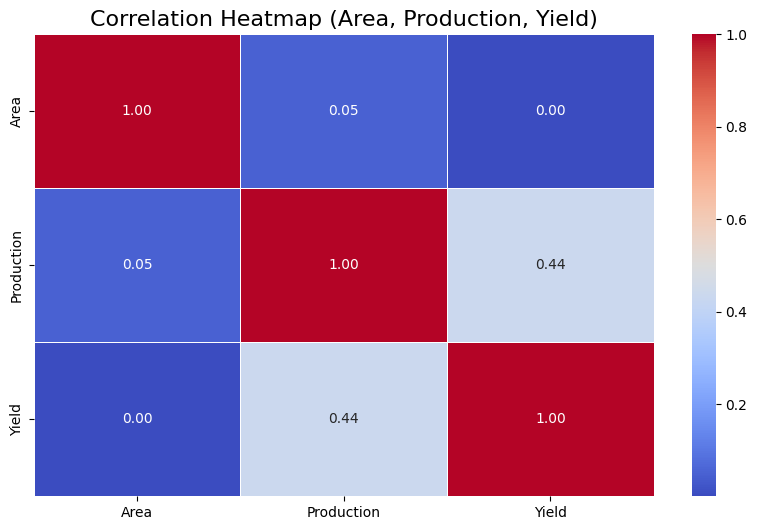

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Area', 'Production', 'Yield']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Area, Production, Yield)', fontsize=16)
plt.show()


In [30]:
# Assuming df is your DataFrame
correlation_matrix = df[['Area', 'Production', 'Yield']].corr()

# Print the correlation matrix
print(correlation_matrix)

                Area  Production     Yield
Area        1.000000    0.049254  0.000292
Production  0.049254    1.000000  0.437274
Yield       0.000292    0.437274  1.000000


# ***Machine Leaning - Model***

***Monitiring Skewness of data***

In [31]:
df[['Production', 'Yield']].skew()

Production    36.023703
Yield         14.475546
dtype: float64

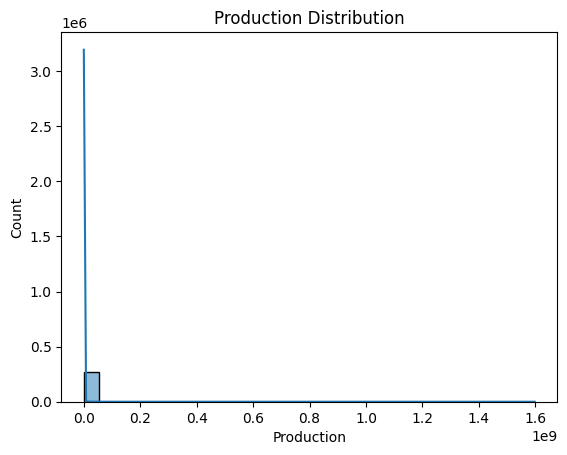

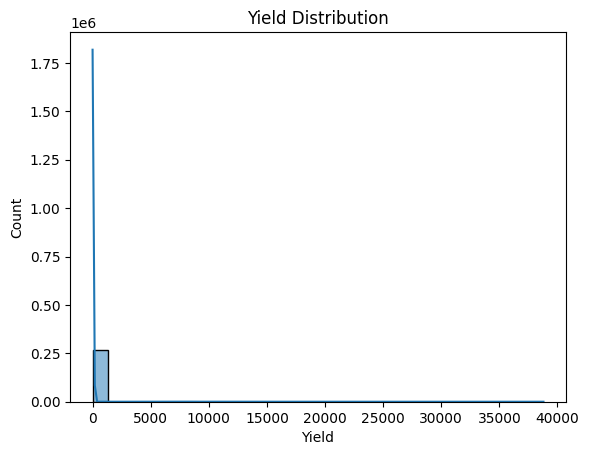

In [32]:
# Checking skewness
sns.histplot(df['Production'], kde=True, bins=30)
plt.title('Production Distribution')
plt.show()

sns.histplot(df['Yield'], kde=True, bins=30)
plt.title('Yield Distribution')
plt.show()

In [33]:
import numpy as np

df['Log_Production'] = np.log1p(df['Production'])  # safer for 0s
df['Log_Yield'] = np.log1p(df['Yield'])


In [34]:
df[['Log_Production', 'Log_Yield']].skew()

Log_Production    0.354535
Log_Yield         3.473956
dtype: float64

In [35]:
df['Sqrt_Yield'] = np.sqrt(df['Yield'])
df['Sqrt_Yield'].skew()


np.float64(11.220058434535536)

In [36]:
from scipy.stats import boxcox

# Filter out 0 values first because Box-Cox needs strictly positive values
positive_yield = df[df['Yield'] > 0]['Yield']
df.loc[df['Yield'] > 0, 'BoxCox_Yield'], _ = boxcox(positive_yield)
df['BoxCox_Yield'].skew()


np.float64(-0.11771581071115118)

We have reduced the ***skewness*** of:


1.   Production: 36 -> 0.35
2.   List item: 14 -> -0.117



***Step 1: Encoding Categorical Variables***

In [37]:
df.columns

Index(['State', 'District', 'Crop', 'Crop_Year', 'Season', 'Area',
       'Production', 'Yield', 'Log_Production', 'Log_Yield', 'Sqrt_Yield',
       'BoxCox_Yield'],
      dtype='object')

In [38]:
# Assuming df is your entire DataFrame
label_encoder_state = LabelEncoder()
label_encoder_district = LabelEncoder()
label_encoder_crop = LabelEncoder()
label_encoder_season = LabelEncoder()

df['State'] = label_encoder_state.fit_transform(df['State'])
df['District'] = label_encoder_district.fit_transform(df['District'])
df['Crop'] = label_encoder_crop.fit_transform(df['Crop'])
df['Season'] = label_encoder_season.fit_transform(df['Season'])

***Step 2: Train-Test Split***

In [39]:
X = df.drop(['Yield'], axis=1)
y = df['Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Step 3: Model Training using RandomForestRegressor***

In [40]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
y_pred = model.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 0.23055106104945916
Mean Squared Error (MSE): 308.18984556686155
Root Mean Squared Error (RMSE): 17.555336669140285
R2 Score: 0.9996901105613414


# ***Model Testing***

In [43]:
import joblib

# Save the LabelEncoder instances
joblib.dump(label_encoder_state, 'label_encoder_state.pkl')
joblib.dump(label_encoder_district, 'label_encoder_district.pkl')
joblib.dump(label_encoder_crop, 'label_encoder_crop.pkl')
joblib.dump(label_encoder_season, 'label_encoder_season.pkl')

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [44]:
joblib.dump(X.columns, 'X_columns.pkl')

['X_columns.pkl']

In [45]:
import joblib

# Assuming your original training DataFrame is 'df'
# Create a mapping of State to its corresponding Districts
state_district_map = df.groupby('State')['District'].unique().to_dict()

# Save the mapping to a file
joblib.dump(state_district_map, 'state_district_map.pkl')


['state_district_map.pkl']

In [46]:
import joblib
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# Load LabelEncoders
label_encoder_state = joblib.load('/content/label_encoder_state.pkl')
label_encoder_district = joblib.load('/content/label_encoder_district.pkl')
label_encoder_crop = joblib.load('/content/label_encoder_crop.pkl')
label_encoder_season = joblib.load('/content/label_encoder_season.pkl')

# Load trained model
model = joblib.load('/content/random_forest_model.pkl')

# Load training column structure (important for reindexing)
X = joblib.load('/content/X_columns.pkl')  # You must save this during training as: joblib.dump(X.columns, 'X_columns.pkl')

# Function to handle unseen labels
def encode_with_unseen(encoder, data, default_value=-1):
    try:
        return encoder.transform(data)
    except ValueError:
        return [default_value if label not in encoder.classes_ else encoder.transform([label])[0] for label in data]

# Input data
data = {
    'State': ['Jharkhand', 'Jammu and Kashmir', 'Haryana', 'Uttar Pradesh', 'Tamil Nadu'],
    'District': ['RAMGARH', 'REASI', 'GURGAON', 'JALAUN', 'MADURAI'],
    'Crop': ['Potato', 'Moong(Green Gram)', 'Sweet potato', 'Sannhamp', 'Sugarcane'],
    'Crop_Year': [2013, 2015, 2009, 2010, 2006],
    'Season': ['Winter', 'Kharif', 'Whole Year', 'Kharif', 'Whole Year'],
    'Area': [1361.0, 13.0, 39.0, 9.0, 6006.0],
    'Production': [7544.0, 9.0, 800.0, 3.0, 656204.0]
}

# Create DataFrame
input_df = pd.DataFrame(data)

# Encode categorical features
input_df['State'] = encode_with_unseen(label_encoder_state, input_df['State'])
input_df['District'] = encode_with_unseen(label_encoder_district, input_df['District'])
input_df['Crop'] = encode_with_unseen(label_encoder_crop, input_df['Crop'])
input_df['Season'] = encode_with_unseen(label_encoder_season, input_df['Season'])

# Calculate Yield
input_df['Yield'] = input_df['Production'] / input_df['Area']

# Apply skewness transformations
input_df['Log_Production'] = np.log1p(input_df['Production'])
input_df['Log_Yield'] = np.log1p(input_df['Yield'])
input_df['Sqrt_Yield'] = np.sqrt(input_df['Yield'])

# Handle Box-Cox
input_df['BoxCox_Yield'] = 0
positive_yield = input_df['Yield'][input_df['Yield'] > 0]
if not positive_yield.empty:
    input_df.loc[input_df['Yield'] > 0, 'BoxCox_Yield'], _ = boxcox(positive_yield)

# Match column structure with training data
input_df = input_df.reindex(columns=X, fill_value=0)

# Predict
input_pred = model.predict(input_df)

# Show predictions
print("Final Input Data for Prediction:")
print(input_df)

print("\nPredictions:")
for i, pred in enumerate(input_pred):
    print(f"Predicted Yield for row {i+1}: {pred}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/label_encoder_state.pkl'

In [ ]:
!pip install dask
!pip install pyarrow
!pip install dask-ml[complete]


In [ ]:
import dask.dataframe as dd
from sklearn.ensemble import RandomForestRegressor
from dask_ml.wrappers import ParallelPostFit

# Initialize base scikit-learn RandomForestRegressor
base_rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Wrap with Dask's ParallelPostFit
dask_model = ParallelPostFit(base_rf)

# Convert data to Dask DataFrame - using only a portion of the data for demonstration
# Using partitions based on dataset size (number of rows divided by 4)
partition_size = len(X_train) // 4
dask_X_train = dd.from_pandas(X_train, npartitions=partition_size)
dask_y_train = dd.from_pandas(pd.Series(y_train), npartitions=partition_size)

# Train the model - with proper error handling
try:
    # Option 1: Use Dask compute to convert back to pandas for fitting
    dask_model.fit(dask_X_train.compute(), dask_y_train.compute())
    print("Dask-powered model training completed successfully!")
except Exception as e:
    print(f"Error with Dask: {e}")
    print("Falling back to regular training...")
    # Option 2: Fall back to regular training if Dask fails
    model_fallback = RandomForestRegressor(n_estimators=50, random_state=42)
    model_fallback.fit(X_train, y_train)
    dask_model = model_fallback